In [35]:
import pandas as pd
import numpy as np
import requests

import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 

import plotly.express as px
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

import spacy
import pickle

# import imageio
import folium
# import folium.plugins as plugins
# from mpl_toolkits.basemap import Basemap

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [1]:
business_dir = "./yelp_csv/yelp_business.csv"
biz_attrs_dir = "./yelp_csv/yelp_business_attributes.csv"
business_hours_dir = "./yelp_csv/yelp_business_hours.csv"
check_in_dir = "./yelp_csv/yelp_checkin.csv"
reviews_dir = "./yelp_csv/yelp_review.csv"
tip_dir = "./yelp_csv/yelp_tip.csv"
user_dir = "./yelp_csv/yelp_user.csv"

In [4]:
# Load data
steakhouses_dir = 'loaded_data/steakhouses.pkl'
reviews_dir = 'loaded_data/reviews_steak.pkl'
steakhouses = load_df_from_pickle(steakhouses_dir)
reviews = load_df_from_pickle(reviews_dir)

## WHERE ARE THE STEAKHOUSES

In [480]:
# Create location visualization
m = folium.Map(location=[36.188110, -115.176468], zoom_start=12)

# Add markers for each restaurant
for _, row in steakhouses.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name']
    ).add_to(m)

# Save the map as an HTML file
m.save('restaurant_map.html')

## Text Processing for Reviews (reviews_steak table)

In [192]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from afinn import Afinn

from nltk.util import ngrams
from collections import Counter

afinn = Afinn()

# nltk.download('punkt')  # Download NLTK data for tokenization
# nltk.download('words')  # Download NLTK data for words
# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

In [427]:
# User star reviews
user_stars = reviews_steak[['name', 'stars_x']]
user_stars = user_stars.groupby('name')['stars_x'].apply(list).reset_index()
user_stars['avg_stars'] = user_stars['stars_x'].apply(lambda x: sum(x) / len(x))
user_stars['num_star_ratings'] = user_stars['stars_x'].apply(lambda x: len(x))

# custom_horizontal_boxplot(user_stars.T, color='#FCF55F')
user_stars.sort_values(by='num_star_ratings', ascending = False, inplace=True)
user_stars.head(5)

name  \
101                           "Mon Ami Gabi"   
71                     "Gordon Ramsay Steak"   
203                             "Yard House"   
184             "Tom Colicchio's Craftsteak"   
83   "Joes Seafood Prime Steak & Stone Crab"   

                                               stars_x  avg_stars  \
101  [4, 5, 2, 4, 5, 2, 5, 5, 3, 4, 4, 2, 5, 4, 5, ...   4.120484   
71   [1, 1, 5, 5, 5, 5, 2, 5, 3, 4, 5, 2, 5, 1, 3, ...   3.921241   
203  [5, 3, 5, 2, 4, 5, 5, 4, 3, 5, 5, 4, 3, 4, 4, ...   3.928723   
184  [3, 5, 5, 4, 4, 4, 5, 5, 4, 5, 4, 5, 5, 5, 2, ...   4.007648   
83   [3, 2, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 4, 4, ...   4.327075   

     num_star_ratings  
101              7362  
71               2933  
203              2834  
184              2092  
83               2024

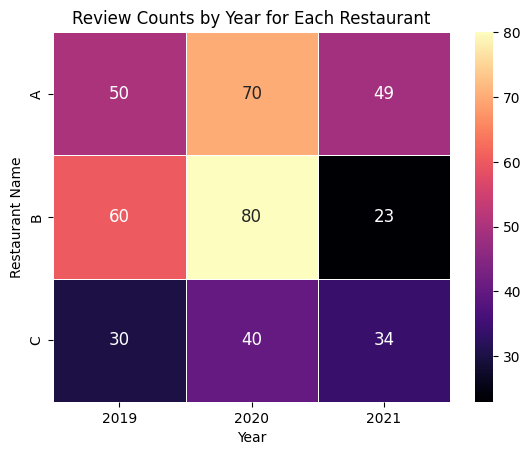

In [158]:
# Square grids plot
data = {
    'RestaurantName': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Year': [2019, 2019, 2019, 2020, 2020, 2020, 2021, 2021, 2021],
    'ReviewCount': [50, 60, 30, 70, 80, 40, 49, 23, 34]
}

df = pd.DataFrame(data)

# Pivot the data
pivot_table = df.pivot_table(values='ReviewCount', index='RestaurantName', columns='Year', fill_value=0)
annot_font_size = 12  # Adjust the font size as needed

sns.heatmap(
    pivot_table,
    cmap='magma',
    annot=True,
    linewidths=0.5,
    cbar=True,
    annot_kws={'size': annot_font_size}  # Set the font size for annotations
)

# Customize labels and titles
plt.xlabel('Year')
plt.ylabel('Restaurant Name')
plt.title('Review Counts by Year for Each Restaurant')

# Show the plot
plt.show()


In [20]:
# GOOGLE API with your API key and place ID
api_key = google_api
place_id = 'PLACE_ID_OF_THE_RESTAURANT'

# Define the API endpoint for place details
endpoint = f'https://maps.googleapis.com/maps/api/place/details/json?place_id={place_id}&key={api_key}'

# Make the API request
response = requests.get(endpoint)

# Parse the JSON response
data = response.json()

# Extract restaurant information from the response
restaurant_name = data['result']['name']
restaurant_address = data['result']['formatted_address']
restaurant_phone = data['result']['formatted_phone_number']

# You can extract other information as needed


# DEMO

In [478]:
def plot_stacked_vertical_bar_chart(data, 
                               x_col, y_col1, y_col2, 
                               x_label, y_label,
                               title='',
                               color1='green',color2='orange'):
    """
    Create a stacked vertical bar chart using Seaborn.

    Parameters:
    - data: DataFrame containing the data.
    - x_col: Name of the column for the x-axis (e.g., 'Year').
    - y_col1: Name of the first data column for stacking.
    - y_col2: Name of the second data column for stacking.
    - title: Title of the plot.

    Returns:
    - A Seaborn stacked vertical bar chart.
    """
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    sns.set(style="whitegrid")
    
    # Use the Seaborn barplot function to create the stacked bar chart
    sns.barplot(x=x_col, y=y_col1, data=data, color=color1, label=y_col1)
    sns.barplot(x=x_col, y=y_col2, data=data, color=color2, label=y_col2, bottom=data[y_col1])
    
    # Customize the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Add a legend
    plt.legend(title="", loc="upper left")
    plt.savefig("./demo_plots/stacked_bar_chart.svg", format='svg')
    
    # Show the plot
    plt.show()

def plot_bar_and_line_chart(data, col_bar_y1, col_line_y2, col_x, 
                            y1_label="", y2_label="", x_label="",
                            title="",
                            bar_color="b", line_color="r",
                            figsize=(10, 6)):

    # Extract the years, number of ratings, and average star values from the data
    x = data[col_x]
    bar_y1 = data[col_bar_y1]
    line_y2 = data[col_line_y2]

    # Create a figure and axis for the plot
    fig, ax1 = plt.subplots(figsize=figsize)

    # Bar chart:
    ax1.bar(x=x, height=bar_y1, color=bar_color, alpha=0.5, label=y1_label)
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y1_label)
    ax1.tick_params(axis='y')
    
    
    # Create a second y-axis for the line chart
    ax2 = ax1.twinx()

    # Line chart:
    ax2.plot(x, line_y2, color=line_color, marker='o', label=y2_label)
    ax2.set_ylabel(y2_label)
    ax2.grid(visible=False)

    # Add a legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    # Set the title and x-axis label
    plt.title(title)
    plt.xlabel('Year')
    ax2.set_ylim(top=5, bottom=0)
    plt.savefig("./demo_plots/bar_line_chart.svg", format='svg')

    # Show the plot
    plt.show()


def plot_bubble_chart(data, 
                    x_axis, y_axis, 
                    bubble_size, color, 
                    hover_name, 
                    title, size_max=50, 
                    figsize=(1000, 700),
                    color_discrete_sequence=None, 
                    template='plotly', 
                    x_title=None, y_title=None, 
                    color_continuous_scale=None,
                    font_size=12):

    fig = px.scatter(data,
                     x=x_axis,
                     y=y_axis,
                     size=bubble_size,
                     color=color,
                     hover_name=hover_name,
                     hover_data={x_axis: ':.2f', y_axis: True, bubble_size: True},
                     title=title,
                     size_max=size_max,
                     color_discrete_sequence=color_discrete_sequence,
                     template=template,
                     color_continuous_scale=color_continuous_scale)

    # Customize axis titles
    fig.update_layout(
        font=dict(
        family="Helvetica Neue",
        size=font_size,  # Set the font size here
        # color="RebeccaPurple"
    ),
        xaxis_title=x_title if x_title else x_axis,
        yaxis_title=y_title if y_title else y_axis,
    )

    fig.update_layout(legend = dict(font = dict(size = 11)),
                      legend_title = dict(font = dict(size = 11)))
    
    fig.update_layout(
    legend=dict(x=0.5, y=-0.2, xanchor='center', yanchor='top'), # Adjust y to move legend inside subplot
    legend_orientation='h'
)
    # fig.update_layout(width=figsize[0], height=figsize[1], autosize=True)
    fig.update_layout(autosize=True)
    fig.write_html("./demo_plots/bb_chart.html")
    fig.show()


def count_bigrams(df, text_col):
    # Tokenize the text and create bigrams
    bigrams = []
    stop_words = set(stopwords.words('english'))

    for text in df[text_col]:
         # char.isalnum() or
        text = ''.join(char for char in text if char.isalnum() or char.isspace())  # Remove punctuation and special characters
        tokens = nltk.word_tokenize(text.lower())  # Convert text to lowercase and tokenize
        bigrams.extend(list(ngrams(tokens, 2)))

    # Filter out bigrams with stop words
    filtered_bigrams = [bigram for bigram in bigrams if bigram[0] not in stop_words and bigram[1] not in stop_words]

    # Count the occurrences of each unique bigram pair
    bigram_counts = Counter(filtered_bigrams)

    # print(bigram_counts.items())
    # # Create a DataFrame with (word1, word2) and count columns
    w1 = [' '.join(i) for i in list(bigram_counts.keys())]
    w2 = list(bigram_counts.values())
    bigram_df = pd.DataFrame(zip(w1, w2), columns=['word', 'count'])
    # bigram_df['count'] = bigram_df['count']

    # # Sort the DataFrame by count in descending order
    bigram_df = bigram_df.sort_values(by='count', ascending=False).reset_index()

    return bigram_df

In [460]:
"""
Restaurant used: Mastro's Ocean Club
Business ID: GI-CAiZ_Gg3h21PwrANB4Q
"""
reviews['dt_date'] = pd.to_datetime(reviews['date'])
reviews['dt_year'] = reviews['dt_date'].dt.year
reviews['dt_month'] = reviews['dt_date'].dt.month
mastro = reviews.loc[reviews['business_id']=='GI-CAiZ_Gg3h21PwrANB4Q']

## SERVICE QUALITY MONITORING
# Metric 1: Positive & Negative Reviews Trends over Year
pos_reviews = mastro[mastro.stars_x > 3]
neg_reviews = mastro[mastro.stars_x < 3]
count_pos_reviews = pos_reviews[['dt_year', 'stars_x']].groupby(['dt_year']).agg('count')
count_neg_reviews = neg_reviews[['dt_year', 'stars_x']].groupby(['dt_year']).agg('count')
count_pos_reviews.rename(columns={'stars_x': "pos_counts"}, inplace=True)
count_neg_reviews.rename(columns={'stars_x': "neg_counts"}, inplace=True)
count_reviews = count_pos_reviews.merge(count_neg_reviews, on='dt_year', how='outer')

# Metric 2: Average Number of Star Ratings (Yelp) over Year
star_avg = mastro[['dt_year', 'stars_x']].groupby(['dt_year']).agg('mean')
star_avg.rename(columns={'stars_x': "star_avg"}, inplace=True)
num_ratings = mastro[['dt_year', 'stars_x']].groupby(['dt_year']).agg('count')
num_ratings.rename(columns={'stars_x': "num_ratings"}, inplace=True)
num_ratings_with_avg = num_ratings.merge(star_avg, on='dt_year', how='outer')
num_ratings_with_avg['dt_year'] = num_ratings_with_avg.index

# Metric 3: Top 5 Most Frequent Phrases in Positive & Negative Reviews (Yelp)
# bi-gram model: 
bigram_neg = count_bigrams(neg_reviews, 'text')
bigram_pos = count_bigrams(pos_reviews, 'text')
bigram_neg.reset_index(inplace=True)
bigram_pos.reset_index(inplace=True)

# Metric 4: Top 10 Positive & 10 Negative Reviews based on Commmunity Feedback

# top_pos_reviews = mastro.sort_values(by='stars_x')
# top_neg_reviews = mastro.sort_values()
## Use sentiment analysis


## COMPETITION BENCHMARKING
# Metric: Yelp/Google Average Star Rating
top_7_num_reviewed = reviews[['name']].value_counts().head(7)

top_7_num_reviewed = [i[0] for i in top_7_num_reviewed.index]

bb_chart = {
    'Restaurant': [],
    'Average_Star_Rating': [],
    'Number_of_Reviews': [],
    'Years_of_Operation': []
}
for r in top_7_num_reviewed:
    bb_chart['Restaurant'].append(r)
    data = reviews.loc[reviews['name'] == r]
    avg_rating = sum(data['stars_x'])/len(data['stars_x'])
    bb_chart['Average_Star_Rating'].append(round(avg_rating, 3))

    num_rev = len(data['stars_x'])
    bb_chart['Number_of_Reviews'].append(num_rev)

    year_op = max(data.dt_year) - min(data.dt_year)
    bb_chart['Years_of_Operation'].append(year_op)

# Metric: Top 5 most Positive/Negative popular keywords for a set of restaurant

# Metric: Top 5 most Positive/Negative popular keywords for a set of restaurant


In [467]:
# import plotly.graph_objects as go

# def plot_bar_and_line_chart(data, col_bar_y1, col_line_y2, col_x, 
#                             y1_label="", y2_label="", x_label="",
#                             title="",
#                             bar_color="b", line_color="r",
#                             figsize=(800, 500), save_filename="bar_and_line_chart.html"):

#     # Create traces for bar and line
#     trace_bar = go.Bar(x=data[col_x], y=data[col_bar_y1], name=y1_label, marker=dict(color=bar_color))
#     trace_line = go.Scatter(x=data[col_x], y=data[col_line_y2], mode='lines+markers', name=y2_label, line=dict(color=line_color))

#     # Create layout
#     layout = go.Layout(title=title, xaxis=dict(title=x_label), yaxis=dict(title=y1_label), yaxis2=dict(title=y2_label, overlaying='y', side='right'))

#     # Create figure
#     fig = go.Figure(data=[trace_bar, trace_line], layout=layout)

#     # Save the chart as an HTML file
#     fig.write_html(save_filename, auto_open=False)

#     # Show the chart
#     fig.show()

# Example usage:
# plot_bar_and_line_chart(data=df, col_bar_y1='num_ratings', col_line_y2='star_avg', col_x='dt_year',
#                         y1_label="Number of Ratings", y2_label="Average Star Rating", x_label="Year",
#                         title="Ratings and Star Ratings Over the Years", bar_color="blue", line_color="red")


In [519]:
pos_df = bigram_pos[['word', 'count']].head(5).to_html(classes = 'table table-bordered', index=False)
pos_df

'<table border="1" class="dataframe table table-bordered">\n  <thead>\n    <tr style="text-align: right;">\n      <th>word</th>\n      <th>count</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td>butter cake</td>\n      <td>366</td>\n    </tr>\n    <tr>\n      <td>mashed potatoes</td>\n      <td>230</td>\n    </tr>\n    <tr>\n      <td>lobster mashed</td>\n      <td>166</td>\n    </tr>\n    <tr>\n      <td>sea bass</td>\n      <td>161</td>\n    </tr>\n    <tr>\n      <td>ocean club</td>\n      <td>115</td>\n    </tr>\n  </tbody>\n</table>'

In [524]:
from lxml import etree, html

document_root = html.fromstring(neg_df)
print(etree.tostring(document_root, encoding='unicode', pretty_print=True))

<table border="1" class="dataframe table table-bordered">
  <thead>
    <tr style="text-align: right;">
      <th>word</th>
      <th>count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>mashed potatoes</td>
      <td>19</td>
    </tr>
    <tr>
      <td>medium rare</td>
      <td>17</td>
    </tr>
    <tr>
      <td>butter cake</td>
      <td>16</td>
    </tr>
    <tr>
      <td>sea bass</td>
      <td>13</td>
    </tr>
    <tr>
      <td>lobster mashed</td>
      <td>12</td>
    </tr>
  </tbody>
</table>



In [517]:
neg_df = bigram_neg[['word', 'count']].head(5).to_html(classes = 'table table-bordered', index=False)

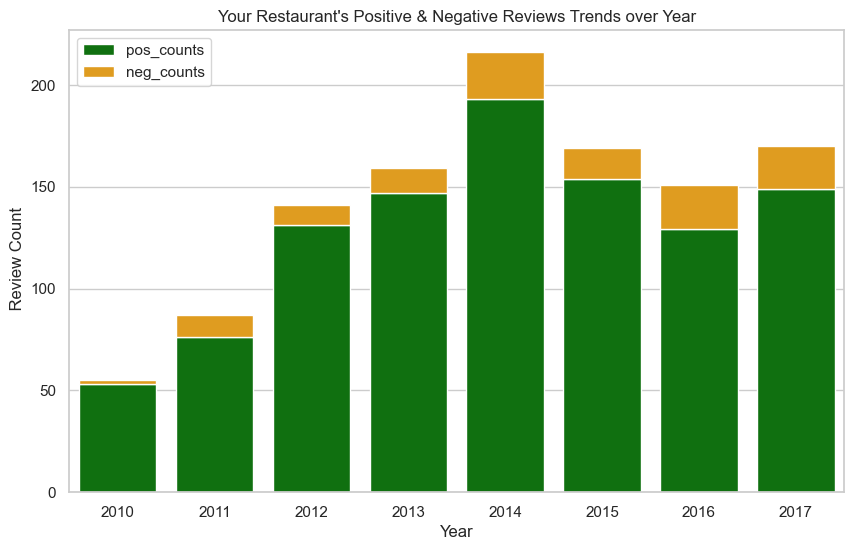

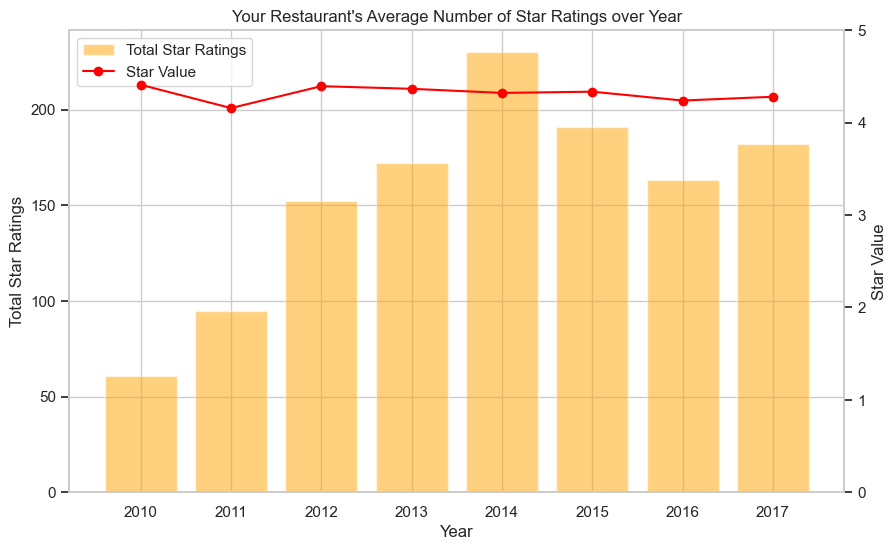

word  count
0     mashed potatoes     19
1         medium rare     17
2         butter cake     16
3            sea bass     13
4      lobster mashed     12
5         much better     11
6           well done     11
7           las vegas     10
8          ocean club     10
9            ahi tuna      9
10      beverly hills      9
11        tasted like      8
12  dining experience      8
13        chilean sea      8
14         didnt want      7
15  made reservations      7
16         20 minutes      7
17         didnt even      7
18    chilean seabass      6
19     gorgonzola mac      6

word  count
0         butter cake    366
1     mashed potatoes    230
2      lobster mashed    166
3            sea bass    161
4          ocean club    115
5          tree house    108
6           las vegas    105
7         warm butter    105
8            ive ever    100
9         chilean sea     77
10  dining experience     76
11      whipped cream     76
12          next time     71
13      seafood tower     71
14        medium rare     70
15      mastros ocean     67
16          king crab     62
17       bread basket     61
18     lobster bisque     61
19   highly recommend     58

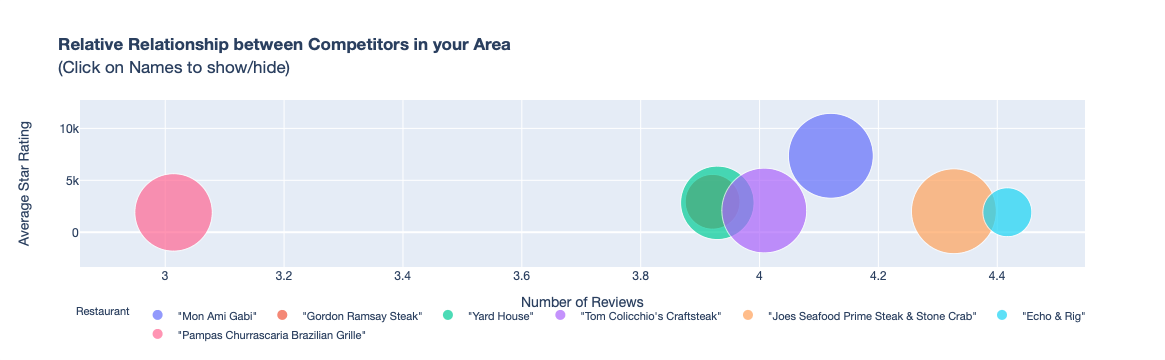

In [513]:
# Metric 1: Positive & Negative Reviews Trends over Year
plot_stacked_vertical_bar_chart(count_reviews, 
                           x_col="dt_year", y_col1="pos_counts", y_col2="neg_counts",
                           x_label='Year', y_label=' Review Count',
                           title="Your Restaurant's Positive & Negative Reviews Trends over Year")

# Metric 2: Average Number of Star Ratings (Yelp) over Year
plot_bar_and_line_chart(data=num_ratings_with_avg, 
                        col_bar_y1='num_ratings', col_line_y2='star_avg', col_x='dt_year', 
                        y1_label="Total Star Ratings", y2_label="Star Value", x_label="Year",
                        title="Your Restaurant's Average Number of Star Ratings over Year",
                        bar_color="orange", line_color="red")

# Metric 3: Top 5 Most Frequent Phrases in Positive & Negative Reviews (Yelp)
display(bigram_neg[['word', 'count']].head(20))
display(bigram_pos[['word', 'count']].head(20))
bigram_pos[['word', 'count']].head(20).to_html
bigram_pos[['word', 'count']].head(20).to_html

# Metric 4: Top 10 Positive & 10 Negative Reviews based on Commmunity Feedback



## COMPETITION BENCHMARKING
# Metric: Yelp/Google Average Star Rating
plot_bubble_chart(bb_chart,
                 x_axis='Average_Star_Rating',
                 y_axis='Number_of_Reviews',
                 x_title='Number of Reviews', y_title='Average Star Rating',
                 bubble_size='Years_of_Operation',
                 color='Restaurant',
                 hover_name='Restaurant',
                 title=' <b> Relative Relationship between Competitors in your Area </b>  <br> (Click on Names to show/hide)',
                 size_max=60,
                font_size=12)

# Metric: Top 5 most Positive/Negative popular keywords for a set of restaurant

# Metric: Top 5 most Positive/Negative popular keywords for a set of restaurant


# MACRO-LEVEL LANDSCAPE IN MVP 1: RESTAURANTS IN LAS VEGAS

**Q1: What are the distribution of service types in Las Vegas** 

In [147]:
lv_macro_data = business[business['city'] == 'Las Vegas']

In [154]:
lv_macro_data['categories']

6         [Real Estate Services, Real Estate, Home Servi...
7                                [Shopping, Sporting Goods]
26        [Shopping, Jewelry, Watch Repair, Local Services]
41        [Home Services, Lighting Fixtures & Equipment,...
48         [Nurseries & Gardening, Home & Garden, Shopping]
                                ...                        
174539    [Real Estate Services, Home Services, Property...
174545                                 [Coffee & Tea, Food]
174546    [Mobile Phone Accessories, Mobile Phones, Elec...
174552    [Martial Arts, Sports Wear, Men's Clothing, Sp...
174556                           [Beauty & Spas, Skin Care]
Name: categories, Length: 26775, dtype: object